In [1]:
cd /content/drive/MyDrive/Fruit_Class_VGG

/content/drive/MyDrive/Fruit_Class_VGG


In [ ]:
!unrar x /content/drive/MyDrive/data1.rar /content/drive/MyDrive/Fruit_Class_VGG


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
import datetime

In [ ]:
IMG_SHAPE = (224,224,3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rescale=1/255,width_shift_range=0.2,height_shift_range=0.2, fill_mode='nearest',  horizontal_flip=True)
valid_generator = ImageDataGenerator(rescale=1/255,width_shift_range=0.2,height_shift_range=0.2, fill_mode='nearest',  horizontal_flip=True)
train_folder ='./data/train'
valid_folder ='./data/val'
generated_train_data = train_generator.flow_from_directory(
    train_folder,
    target_size =(224,224),
    batch_size=50,
    class_mode='categorical'
)
generated_valid_data = valid_generator.flow_from_directory(
    valid_folder,
    target_size =(224,224),
    batch_size=50,
    class_mode='categorical'
)

Found 4788 images belonging to 10 classes.
Found 4788 images belonging to 10 classes.


In [ ]:
#Transfer learning with MobileNetV2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
#Keep weight of MobilenetV2
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [ ]:
dense2 = tf.keras.layers.Dense(512)
dense = tf.keras.layers.Dense(10)
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
dense1 = dense2(x)
outputs = dense(dense1)
model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               655872    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 2,918,986
Trainable params: 661,002
Non-trainable params: 2,257,984
______________________________________

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(['loss']),
              metrics=['accuracy'])

In [ ]:
initial_epochs = 5

In [ ]:
history = model.fit(generated_train_data,
                    epochs=initial_epochs,
                    validation_data=generated_valid_data)

Epoch 1/5
96/96 [==============================] - 100s 1s/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 2/5
96/96 [==============================] - 99s 1s/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 3/5
96/96 [==============================] - 99s 1s/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 0.9998
Epoch 4/5
96/96 [==============================] - 101s 1s/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 5/5
96/96 [==============================] - 103s 1s/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000


In [ ]:
save_path = 'myModel_weight.h5'
model.save_weights(save_path)

Saving firefox_2018-07-10_07-50-11.jpg to firefox_2018-07-10_07-50-11 (2).jpg
Appl


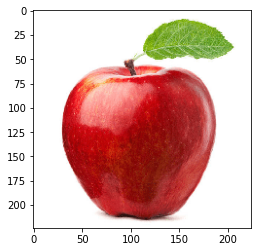

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image
import PIL
uploaded = files.upload()
for fn in uploaded.keys():

  path = "./" + fn
  img = image.load_img(path, target_size=(224,224))
  x = image.img_to_array(img)/255
  x = np.expand_dims(x, axis=0)
  image = np.vstack([x])

#Predict ảnh
classes = model.predict(image,batch_size=10)

#Xử lí sau predict và in ra output
label=np.argmax(classes)
fruit=['Appl','Bana','Blue','Corn','Kiwi','Lemo','Oran','Pine','Stra','Wate']
print((fruit[label]))
plt.imshow(img)